# Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
#import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

ModuleNotFoundError: No module named 'sklearn'

# Cargar dataset desde Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip gtsrb-german-traffic-sign.zip

unzip:  cannot find or open gtsrb-german-traffic-sign.zip, gtsrb-german-traffic-sign.zip.zip or gtsrb-german-traffic-sign.zip.ZIP.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yBUb4IKwJjCNaRwLNCDE")
project = rf.workspace("signs-dratl").project("senales-j49ok")
dataset = project.version(1).download("tfrecord")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e7a3c6961221c5b270852e00ee738c1ef5ed7157f155c449ccbc1c9633d74ba4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to senales-1 in tfrecord:: 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]


# Variables globales

In [ ]:
! unzip dataset.zip -d /content

In [ ]:
%cd /content/dataset/
! rm -rf 0
! rm -rf 1
! rm -rf 2
! rm -rf 3
! rm -rf 4
! rm -rf 5
! rm -rf 6
! ls

/content/dataset
construction  conv  forward  giveway  left  right  stop


In [ ]:
data = []
labels = []
classes = 6
cur_path = "/content"
print(cur_path)

/content


# Cargar dataset y prepararlo

In [ ]:
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    print(path)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

/content/train/0
Error loading image
Error loading image
Error loading image
/content/train/1
Error loading image
Error loading image
/content/train/2
Error loading image
Error loading image
Error loading image
/content/train/3
Error loading image
Error loading image
Error loading image
/content/train/4
Error loading image
Error loading image
Error loading image
/content/train/5
Error loading image
Error loading image
Error loading image
Error loading image
/content/train/6
Error loading image
Error loading image
Error loading image
/content/train/7


FileNotFoundError: ignored

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

NameError: ignored

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=42)

(39209, 30, 30, 3) (39209,)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Visualizar datos de entrenamiento

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(30,30))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i])


# Creación del modelo y entrenamiento

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',
                input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train & save model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
                    validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 20s 8ms/step - loss: 2.1886 - accuracy: 0.4518 - val_loss: 0.7118 - val_accuracy: 0.8281
Epoch 2/15
981/981 [==============================] - 6s 6ms/step - loss: 0.8750 - accuracy: 0.7368 - val_loss: 0.3449 - val_accuracy: 0.9046
Epoch 3/15
981/981 [==============================] - 7s 7ms/step - loss: 0.5869 - accuracy: 0.8235 - val_loss: 0.1902 - val_accuracy: 0.9413
Epoch 4/15
981/981 [==============================] - 6s 7ms/step - loss: 0.4311 - accuracy: 0.8701 - val_loss: 0.2073 - val_accuracy: 0.9375
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3607 - accuracy: 0.8919 - val_loss: 0.1572 - val_accuracy: 0.9570
Epoch 6/15
981/981 [==============================] - 6s 6ms/step - loss: 0.3451 - accuracy: 0.8979 - val_loss: 0.1070 - val_accuracy: 0.9681
Epoch 7/15
981/981 [==============================] - 8s 8ms/step - loss: 0.3034 - accuracy: 0.9110 - val_loss: 0.1044 - val_accuracy: 0.9700
Epoch

# Evaluación del modelo entrenado

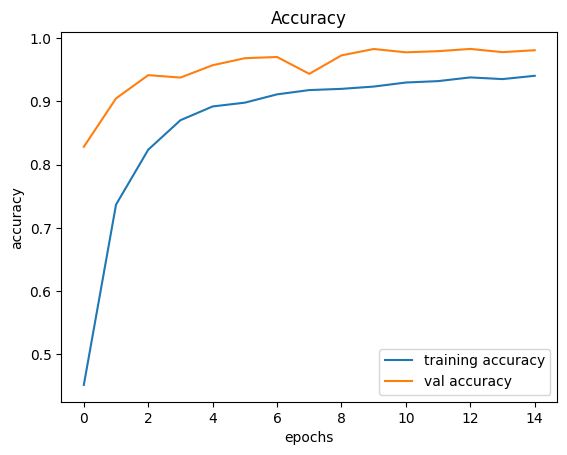

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Text(0, 0.5, 'loss')

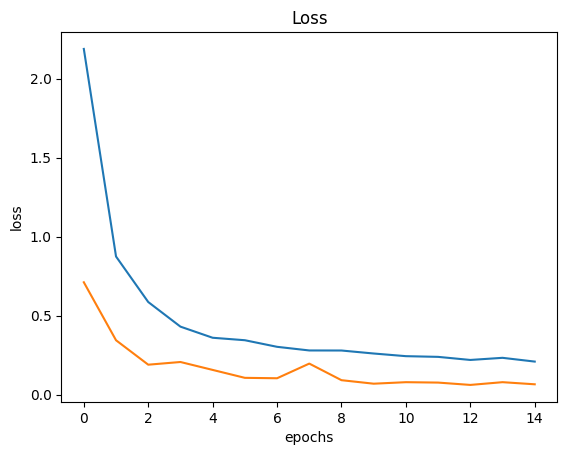

In [ ]:
#Plot loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

# Vericar con dataset de pruebas

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [ ]:
pred = (model.predict(X_test) > 0.8).astype("int32")


395/395 [==============================] - 1s 2ms/step


In [ ]:
print(labels)

[16  1 38 ...  6  7 10]


In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize([30, 30])
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)


395/395 [==============================] - 1s 2ms/step


In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9439429928741092


# Reporte de clasicación

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.94      0.95      0.95       720
           2       0.92      0.99      0.95       750
           3       0.95      0.93      0.94       450
           4       0.97      0.97      0.97       660
           5       0.94      0.89      0.91       630
           6       1.00      0.82      0.90       150
           7       1.00      0.91      0.95       450
           8       0.92      0.96      0.94       450
           9       0.96      0.99      0.97       480
          10       0.94      0.98      0.96       660
          11       0.98      0.96      0.97       420
          12       0.98      0.97      0.98       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.86      0.99      0.92       210
          16       0.97      0.99      0.98       150
          17       0.99    

# MEJORAS ---------------------------------------------------------

# Creación del modelo y entrenamiento

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(12630, 30, 30, 3) (12630,)
(10104, 30, 30, 3) (2526, 30, 30, 3) (10104,) (2526,)


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) # nueva
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

ValueError: ignored

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train & save model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
316/316 [==============================] - 6s 10ms/step - loss: 3.2133 - accuracy: 0.1687 - val_loss: 1.9546 - val_accuracy: 0.4367
Epoch 2/15
316/316 [==============================] - 3s 9ms/step - loss: 1.8052 - accuracy: 0.4776 - val_loss: 0.9635 - val_accuracy: 0.7644
Epoch 3/15
316/316 [==============================] - 2s 7ms/step - loss: 1.0928 - accuracy: 0.6869 - val_loss: 0.4901 - val_accuracy: 0.8646
Epoch 4/15
316/316 [==============================] - 2s 7ms/step - loss: 0.7996 - accuracy: 0.7673 - val_loss: 0.3307 - val_accuracy: 0.9089
Epoch 5/15
316/316 [==============================] - 2s 7ms/step - loss: 0.6028 - accuracy: 0.8255 - val_loss: 0.2880 - val_accuracy: 0.9287
Epoch 6/15
316/316 [==============================] - 3s 8ms/step - loss: 0.4863 - accuracy: 0.8590 - val_loss: 0.1883 - val_accuracy: 0.9533
Epoch 7/15
316/316 [==============================] - 3s 9ms/step - loss: 0.4353 - accuracy: 0.8719 - val_loss: 0.1724 - val_accuracy: 0.9596
Epoch

# Evaluación del modelo entrenado

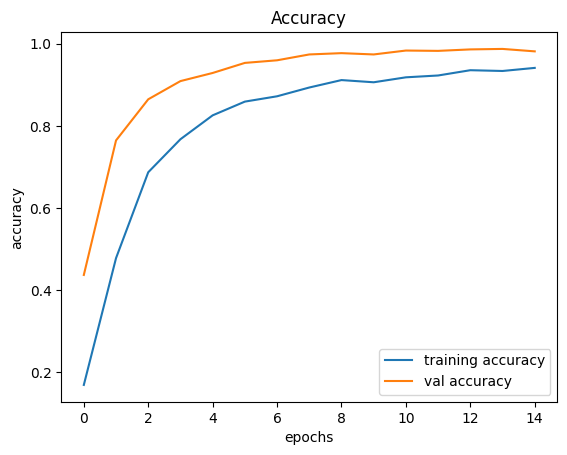

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Text(0, 0.5, 'loss')

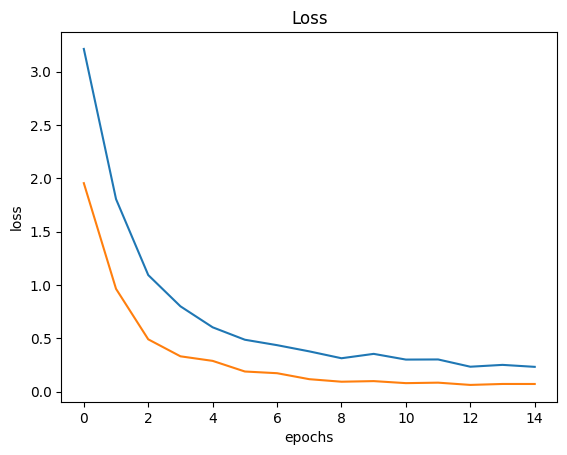

In [ ]:
#Plot loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

# Vericar con dataset de pruebas

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [ ]:
pred = (model.predict(X_test) > 0.8).astype("int32")


395/395 [==============================] - 1s 2ms/step


In [ ]:
print(labels)

[16  1 38 ...  6  7 10]


In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize([30, 30])
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)


395/395 [==============================] - 1s 2ms/step


In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9880443388756928


# Reporte de clasicación

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.99      0.99      0.99       720
           2       1.00      0.97      0.99       750
           3       0.97      0.98      0.98       450
           4       0.98      1.00      0.99       660
           5       0.98      0.97      0.98       630
           6       0.88      1.00      0.94       150
           7       0.97      0.99      0.98       450
           8       0.97      0.98      0.97       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       1.00      1.00      1.00       420
          12       1.00      0.99      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       1.00      0.97      0.99       150
          17       1.00    